# Sales Prediction

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the data and exploring it using Pandas

In [83]:
sp = pd.read_csv('Advertising.csv')
sp

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [84]:
# Removing unwanted columns

In [85]:
copy_sp = sp.drop(columns='Unnamed: 0')
copy_sp

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [86]:
# Preprocessing the data
copy_sp.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [87]:
copy_sp.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [88]:
copy_sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [89]:
copy_sp.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [90]:
copy_sp.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

# Data Visualization

<Axes: >

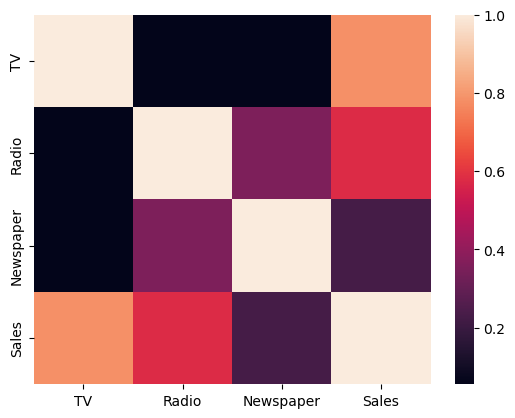

In [92]:
sns.heatmap(copy_sp.corr())

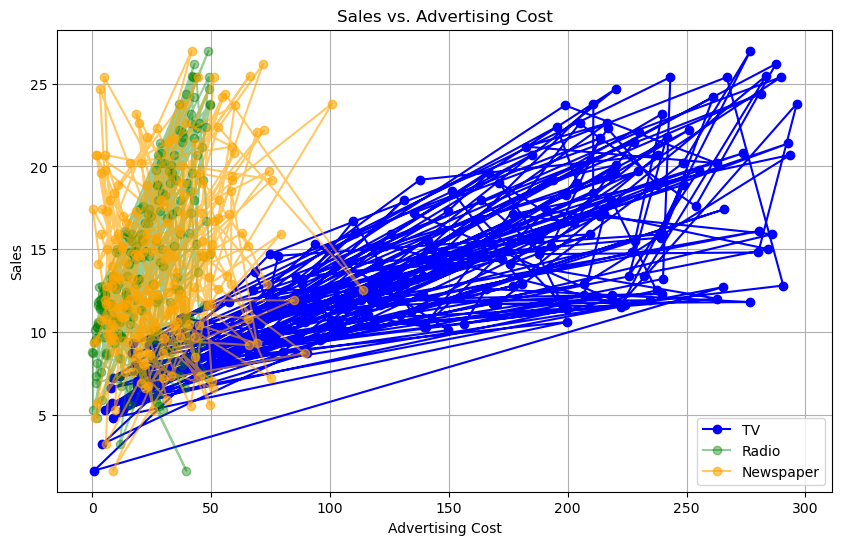

In [93]:
plt.figure(figsize=(10, 6))

# Line plot for TV
plt.plot(copy_sp['TV'], copy_sp['Sales'], marker='o', linestyle='-', color='blue', label='TV')

# Line plot for Radio
plt.plot(copy_sp['Radio'], copy_sp['Sales'], marker='o', linestyle='-', color='green', label='Radio',alpha=0.4)

# Line plot for Newspaper
plt.plot(copy_sp['Newspaper'], copy_sp['Sales'], marker='o', linestyle='-', color='orange', label='Newspaper',alpha=0.6)

plt.xlabel('Advertising Cost')
plt.ylabel('Sales')
plt.title('Sales vs. Advertising Cost')
plt.legend()
plt.grid(True)
plt.show()


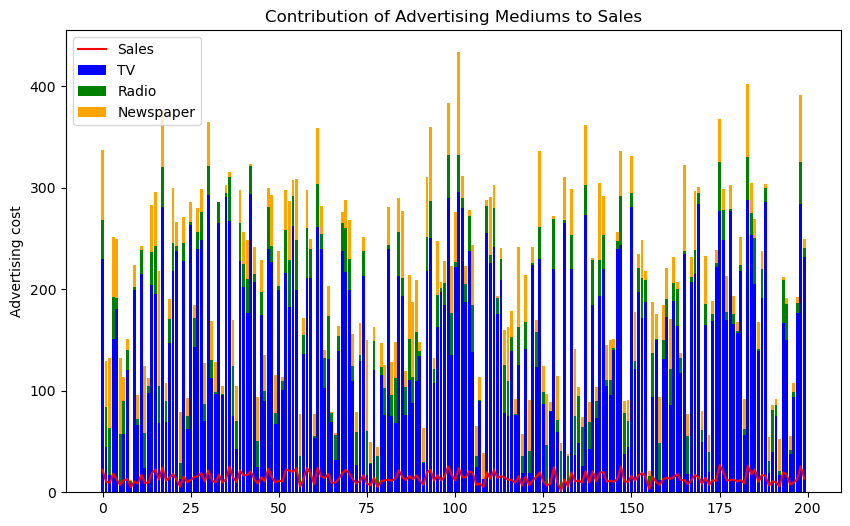

In [94]:
# Calculating the total sales
copy_sp['Total_Sales'] = copy_sp['TV'] + copy_sp['Radio'] + copy_sp['Newspaper']

# Creating a bar plot to show the contribution of each medium to total sales
plt.figure(figsize=(10, 6))

plt.bar(copy_sp.index, copy_sp['TV'], label='TV', color='blue')
plt.bar(copy_sp.index, copy_sp['Radio'], label='Radio', bottom=copy_sp['TV'], color='green')
plt.bar(copy_sp.index, copy_sp['Newspaper'], label='Newspaper', bottom=copy_sp['TV'] + copy_sp['Radio'], color='orange')
plt.plot(copy_sp['Sales'],color='red',label='Sales')

plt.ylabel('Advertising cost')
plt.title('Contribution of Advertising Mediums to Sales')
plt.legend(loc='upper left')
plt.show()


# Applying Linear Regression Between TV and Sales

Mean Squared Error: 10.204654118800956
R-squared: 0.6766954295627077


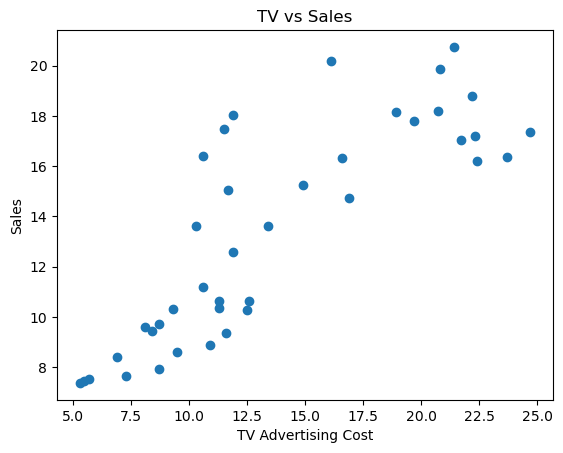

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = copy_sp[['TV']]
y = copy_sp[['Sales']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

%matplotlib inline
plt.scatter(y_test, y_pred)
plt.xlabel("TV Advertising Cost")
plt.ylabel("Sales")
plt.title("TV vs Sales")
plt.show()


# Applying Linear Regression Between Radio and Sales

Mean Squared Error: 23.248766588129108
R-squared: 0.2634309396999791


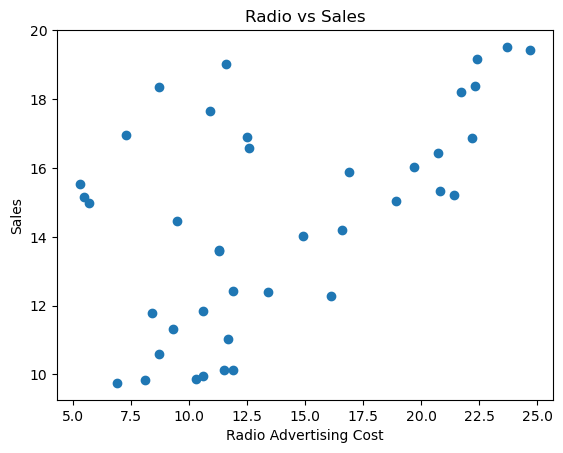

In [96]:
X = copy_sp[['Radio']]
y = copy_sp[['Sales']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

%matplotlib inline
plt.scatter(y_test, y_pred)
plt.xlabel("Radio Advertising Cost")
plt.ylabel("Sales")
plt.title("Radio vs Sales")
plt.show()


# Applying Linear Regression Between Newspaper and Sales

Mean Squared Error: 30.620733995242563
R-squared: 0.029871749149522397


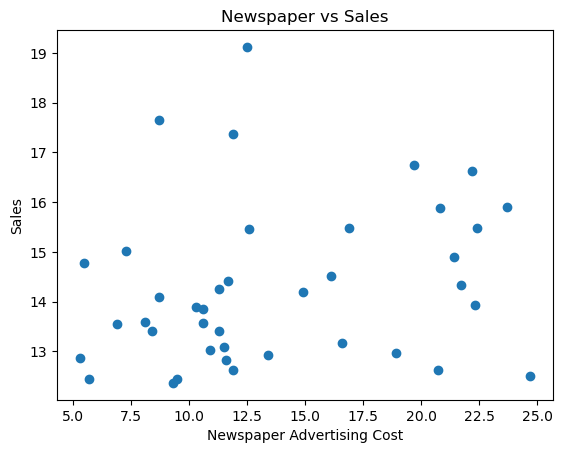

In [97]:
X = copy_sp[['Newspaper']]
y = copy_sp[['Sales']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

%matplotlib inline
plt.scatter(y_test, y_pred)
plt.xlabel("Newspaper Advertising Cost")
plt.ylabel("Sales")
plt.title("Newspaper vs Sales")
plt.show()


# Applying Random Forest Algorithm

In [103]:
from sklearn.ensemble import RandomForestRegressor

# Split the dataset into features (X) and target (y)
X = copy_sp[['TV', 'Radio', 'Newspaper']]
y = copy_sp['Sales']

# Fit the model to the training data
model.fit(X_train, y_train)

# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Data conversion
y_train = y_train.ravel()
y_test = y_test.ravel()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculating the mean squared error and R-squared value
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.5907322499999988
R-squared: 0.9812843792541843


# Applying Logistic Regression

In [104]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

#converting all the data items into int from continuous
data = copy_sp.astype(int)

X1 = data[['TV','Radio', 'Newspaper']]
y1 = data['Sales']

# Split the data into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X1_train = scaler.fit_transform(X1_train)
X1_test = scaler.transform(X1_test)

# Initialize and train a logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X1_train, y1_train)

# Make predictions on the test set
y1_pred = model.predict(X1_test)

#Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.5907322499999988
R-squared: 0.9812843792541843


### We can see that if we use linear regression individually we get less accuracy.
### Whereas if we use random forest or logistic regression we get more accuracy.